## 작업표준+표준위험+위험벡터 데이터 프레임

In [63]:
import pandas as pd
from tqdm import tqdm
import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
from konlpy.tag import Mecab
from keras.preprocessing.text import text_to_word_sequence
import time

mecab = Mecab(dicpath=r"C:/mecab/mecab-ko-dic")

In [64]:
df = pd.read_excel('./data/standard.xlsx').fillna("")
df

,WORK_STAND_NM,WS_ID,WORK_UNIT,WORK_ACT,CHK_INFO,부서,대구분,중구분,소구분
0,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,작업준비,도면 준비 및 자재/공구 준비,-,CHS공사부,후행의장,관철,장비&UNIT
1,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,ANCHOR CHAIN 설치 준비,자재 입고 위치 확인,Dock 장 바닥 배열 가능 공간 확보 필요,CHS공사부,후행의장,관철,장비&UNIT
2,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,ANCHOR CHAIN 설치 준비,자재 입고 임시 적치,권상물 하부 인원 통제,CHS공사부,후행의장,관철,장비&UNIT
3,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,ANCHOR CHAIN 설치 준비,(Anchor Chain 배열 직전) 바닥 오염 방지 천막 배치,배열 전 바닥 오염 방지 천막 배치,CHS공사부,후행의장,관철,장비&UNIT
4,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,ANCHOR CHAIN 설치,Anchor 배열,Bell Mouth 또는 Anchor Pocket 직하부로 배치 (배치 조건 가능 확인),CHS공사부,후행의장,관철,장비&UNIT
...,...,...,...,...,...,...,...,...,...
23625,화물차량(1/2.5/5ton) 운전 및 주정차,WS_1414,운전,"좌,우회전시 30M 전방에서 방향지시등 작동",,판넬조립부,기능,공통,차량운행
23626,화물차량(1/2.5/5ton) 운전 및 주정차,WS_1414,운전,교차로 진입 시 전방 좌우 확인,교차로 15Km/h 이하 운행,판넬조립부,기능,공통,차량운행
23627,화물차량(1/2.5/5ton) 운전 및 주정차,WS_1414,주차,주정차 구역 확인 후 라인에 맞춰 주차,,판넬조립부,기능,공통,차량운행
23628,화물차량(1/2.5/5ton) 운전 및 주정차,WS_1414,주차,주차 후 기어를 P로 놓고 주차 브레이크 체결,,판넬조립부,기능,공통,차량운행


In [65]:
df_act = df['WORK_ACT']+" "+df['CHK_INFO']   # 작업행동과 체크정보를 하나로 묶어서 키워드 분석
df_act.head()

0                                   도면 준비 및 자재/공구 준비 -
1                 자재 입고 위치 확인 Dock 장 바닥 배열 가능 공간 확보 필요
2                             자재 입고 임시 적치 권상물 하부 인원 통제
3    (Anchor Chain 배열 직전) 바닥 오염 방지 천막 배치 배열 전 바닥 오염...
4    Anchor 배열 Bell Mouth 또는 Anchor Pocket 직하부로 배치 ...
dtype: object

## 영어 단어 추출

In [66]:
# eng_results = []
# for sentence in tqdm(df_act):
#     sentence = str(sentence)
#     result = []
# #     tokenizer = RegexpTokenizer("[\w]+")
#     tokenizer = RegexpTokenizer("[^가-힣]+")
# #     tokenizer = RegexpTokenizer("[^가-힣0-9]+")   ## 숫자까지 제거
#     tokens = tokenizer.tokenize(sentence)

#     for token in tokens:
#         token = token.upper().strip().strip("(").strip(")").strip("/").strip("±").strip("mm").strip("?").strip("-").strip(".").strip(",").strip("~")
#         if token not in stop_word and token != '':
#             result.append(token)
#     eng_results.append(result)


In [67]:
# eng_results[200:300]

In [68]:
stop_word = "시 용 전 난 일 걸 뭐 줄 만 건 작업 분 위 개 끝 송 잼 이거 부 동 번 중 듯 차 때 게 내 말 나 수 거 점 것 등 뒤 도 측 의 급 의거 하 후 간 단 시 곳 에 인 조"
stop_word = stop_word.split(' ')

In [69]:
## 영어 단어 개별로 추출
eng_results = []
for sentence in tqdm(df_act):
    sentence = str(sentence)
    result = []
#     tokenizer = RegexpTokenizer("[\w]+")
    tokenizer = RegexpTokenizer("[^가-힣]+")
#     tokenizer = RegexpTokenizer("[^가-힣0-9]+")   ## 숫자까지 제거
    tokens = tokenizer.tokenize(sentence)
    for token_k in tokens:
        token = word_tokenize(token_k)
        for k in token: 
            k = k.upper().strip().strip("(").strip(",").strip("-").strip(")").strip("/").strip("±").strip("mm").strip("?").strip("-").strip(".").strip("~")
            if k not in stop_word and token != '':
                result.append(k)
    eng_results.append(result)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23630/23630 [00:05<00:00, 4374.76it/s]


In [70]:
len(eng_results)

23630

In [71]:
eng_results[0:20]

[['', ''],
 ['DOCK'],
 [],
 ['', 'ANCHOR', 'CHAIN', ''],
 ['ANCHOR', 'BELL', 'MOUTH', 'ANCHOR', 'POCKET', '', ''],
 ['ANCHOR'],
 ['SUS', 'BINDING', 'ANCHOR', 'CHAIN'],
 ['ANCHOR', 'CHAIN', '', 'FATHOM', ''],
 ['ANCHOR', 'CHAIN', 'HANDLING', ''],
 ['ANCHOR', 'CHAIN', '', '', 'ANCHOR', 'CHAIN'],
 [''],
 ['', '', 'KENTER', 'SHACKLE'],
 ['', '', 'KENTER', 'SHACKLE', 'ANCHOR', 'CHAIN'],
 ['', 'KENTER', 'SHACKLE', '', 'TAPER', 'PIN', 'PIN', 'PUNCH'],
 ['', 'TAPER', 'PIN', '', 'LEAD', 'PLUG', 'PLUG', 'HAMMERING', 'CHIP'],
 ['ANCHOR', 'SHACKLE', 'ANCHOR', 'HANDLING', ''],
 ['ANCHOR', 'CHAIN', 'LINE'],
 ['CABLE', 'CLENCH', 'CHAIN', 'BLOCK'],
 ['BELL',
  'MOUTH',
  'POCKET',
  'ANCHOR',
  'CHAIN',
  'WINDLASS',
  'CHAIN',
  'COMPRESSOR'],
 ['ANCHOR', 'CHAIN', 'DOCK', 'WINDLASS', 'CRANE']]

## 한글 형태소 추출 (Mecab)

In [72]:
kor_results = []
for sentence in tqdm(df_act):
    sentence = str(sentence)
    result = []
    for noun in mecab.nouns(sentence):
        if noun not in stop_word:
            result.append(noun)
#     targets.append(sentence)
    kor_results.append(result)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23630/23630 [00:00<00:00, 26852.36it/s]


In [73]:
len(kor_results)

23630

### 한글-영문 키워드 통합

In [74]:
keywords = []
for i in range(len(kor_results)):
    keywords.append(eng_results[i]+kor_results[i])    

In [75]:
keywords

[['', '', '도면', '준비', '자재', '공구', '준비'],
 ['DOCK', '자재', '위치', '확인', '장', '바닥', '배열', '가능', '공간', '확보', '필요'],
 ['자재', '임시', '적치', '상물', '하부', '인원', '통제'],
 ['',
  'ANCHOR',
  'CHAIN',
  '',
  '배열',
  '직전',
  '바닥',
  '오염',
  '방지',
  '배치',
  '배열',
  '바닥',
  '오염',
  '방지',
  '배치'],
 ['ANCHOR',
  'BELL',
  'MOUTH',
  'ANCHOR',
  'POCKET',
  '',
  '',
  '배열',
  '직하',
  '배치',
  '배치',
  '조건',
  '가능',
  '확인'],
 ['ANCHOR', '배열', '주변', '인원', '통제'],
 ['SUS', 'BINDING', 'ANCHOR', 'CHAIN', '체결', '이동', '사고', '주의'],
 ['ANCHOR',
  'CHAIN',
  '',
  'FATHOM',
  '',
  '도장',
  '마킹',
  '필요',
  '부분',
  '도장',
  '순차',
  '도장'],
 ['ANCHOR', 'CHAIN', 'HANDLING', '', '뒤집기', '중량물', '손', '발', '안전', '사고', '주의'],
 ['ANCHOR',
  'CHAIN',
  '',
  '',
  'ANCHOR',
  'CHAIN',
  '도장',
  '반',
  '대면',
  '이동',
  '사고',
  '주의'],
 ['', '배열', '검사'],
 ['',
  '',
  'KENTER',
  'SHACKLE',
  '배열',
  '체결',
  '미니',
  '크레인',
  '활용',
  '안전',
  '규정',
  '확인'],
 ['', '', 'KENTER', 'SHACKLE', 'ANCHOR', 'CHAIN', '배열', '체결', '제외'],
 ['',
  'KEN

### 데이터프레임에 통합

In [76]:
df['keyword'] = keywords

In [77]:
df['keyword'][:10]

0                             [, , 도면, 준비, 자재, 공구, 준비]
1        [DOCK, 자재, 위치, 확인, 장, 바닥, 배열, 가능, 공간, 확보, 필요]
2                         [자재, 임시, 적치, 상물, 하부, 인원, 통제]
3    [, ANCHOR, CHAIN, , 배열, 직전, 바닥, 오염, 방지, 배치, 배열...
4    [ANCHOR, BELL, MOUTH, ANCHOR, POCKET, , , 배열, ...
5                             [ANCHOR, 배열, 주변, 인원, 통제]
6        [SUS, BINDING, ANCHOR, CHAIN, 체결, 이동, 사고, 주의]
7    [ANCHOR, CHAIN, , FATHOM, , 도장, 마킹, 필요, 부분, 도장...
8    [ANCHOR, CHAIN, HANDLING, , 뒤집기, 중량물, 손, 발, 안전...
9    [ANCHOR, CHAIN, , , ANCHOR, CHAIN, 도장, 반, 대면, ...
Name: keyword, dtype: object

## 표준위험 매칭

In [78]:
risks = pd.read_excel("./data/risk_factor.xlsx").fillna("")
risks

,id,위험요인,위험구분,사고유형1,사고유형2,키워드
0,idx_433,NC 절단장비 정반에 발판 미설치 발이 끼여 넘어짐 위험,용접/절단/사상,넘어짐,붕괴/전도/넘어짐,"NC, 절단장비"
1,idx_432,"NC 절단장비 센서, 리미트 수위치 고장 등 오작동에 의한 충돌 위험 (끼임 포함)",용접/절단/사상,충격/충돌,충격/충돌/끼임/베임,"NC, 절단장비"
2,idx_237,NC 절단장비 운전석 이탈시 이동 중인 다른 장비와 충돌 위험,용접/절단/사상,충격/충돌,충격/충돌/끼임/베임,"NC, 절단장비"
3,idx_435,"NC 절단장비 정반 아래에 가스 누출시 화재/폭발 위험 (에틸렌, 산소)",용접/절단/사상,화재/폭발,화재/폭발,"NC, 절단장비"
4,idx_1251,신나를 물병에 보관 사용시 음료로 오용 유해물질접촉 위험,약품/유세,유해물질접촉,이상온도/유해물질접촉,"PASSIVATION, 패시베이션, 약품, 신너, 신나"
...,...,...,...,...,...,...
427,idx_363,히팅토치 점화 전 밸브 개방하여 잔류가스 블로우 하지 않으면 역화로 인한 화재/폭발위험,호스/토치,화재/폭발,화재/폭발,"호스, 에어호스, 히팅토치, 토치, HOSE, TORCH"
428,idx_392,화기 작업 주변에 소화기 방치시 가열에 의한 화재/폭발 위험,용접/절단/사상,화재/폭발,화재/폭발,"화기작업, 화기"
429,idx_861,화기작업시 안전복장 미준수로 이상온도접촉 위험(화상),용접/절단/사상,화재/폭발,화재/폭발,"화기작업, 화기"
430,idx_570,블록내부 환기를 위한 팬모터 이동/작동시 손 끼임 위험,가스/밀폐,끼임,충격/충돌/끼임/베임,"환기팬, 환기, 팬모터"


In [79]:
total_basket = []
for n, words in (enumerate(tqdm(df['keyword']))):
    basket = []
    for word in words:    
        
        for p, risk in enumerate(risks['키워드']):
            risk = str(risk).split(",")   # 키워드 그룹도 하나씩 불러서 리스트로 변환
            compare = []     # 전처리된 키워드를 담을 리스트
            for a in risk:
                a = a.strip(" ")   # 혹시 있을 공란 제거후
                compare.append(a) 
    #            print(compare)

            if word in compare:
                if risks['id'][p] not in basket:
                    basket.append(risks['id'][p])
    #                 print(basket)
                else:
                    pass

    total_basket.append(basket)
print("작업완료")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23630/23630 [02:15<00:00, 174.43it/s]

작업완료


In [80]:
total_basket

[[],
 [],
 ['idx_520'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['idx_1036',
  'idx_1105',
  'idx_1177',
  'idx_98',
  'idx_317',
  'idx_316',
  'idx_321',
  'idx_284',
  'idx_224',
  'idx_299',
  'idx_293',
  'idx_215',
  'idx_745'],
 ['idx_1036',
  'idx_1105',
  'idx_1177',
  'idx_98',
  'idx_317',
  'idx_316',
  'idx_321',
  'idx_284',
  'idx_224',
  'idx_299',
  'idx_293',
  'idx_215',
  'idx_745'],
 ['idx_1036',
  'idx_1105',
  'idx_1177',
  'idx_98',
  'idx_317',
  'idx_316',
  'idx_321',
  'idx_284',
  'idx_224',
  'idx_299',
  'idx_293',
  'idx_215',
  'idx_745',
  'idx_1184',
  'idx_531'],
 ['idx_1184', 'idx_531'],
 ['idx_1036',
  'idx_1105',
  'idx_1177',
  'idx_98',
  'idx_317',
  'idx_316',
  'idx_321',
  'idx_284',
  'idx_224',
  'idx_299',
  'idx_293',
  'idx_215',
  'idx_745'],
 ['idx_1036',
  'idx_1105',
  'idx_1177',
  'idx_98',
  'idx_317',
  'idx_316',
  'idx_321',
  'idx_284',
  'idx_224',
  'idx_299',
  'idx_293',
  'idx_215',
  'idx_745'],
 [],
 ['idx_1184', 'idx

In [81]:
df["위험_id"] = total_basket

In [82]:
df["위험_id개수"] = [len(x) for x in total_basket]
df["위험_id개수"]

0        0
1        0
2        1
3        0
4        0
        ..
23625    0
23626    0
23627    0
23628    0
23629    1
Name: 위험_id개수, Length: 23630, dtype: int64

## 위험 벡터 매칭

In [83]:
vectors = pd.read_excel("./data/risk_vector.xlsx")
vectors.T

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
키워드,권상,권양,슬링밸트,슬링벨트,슬링,클램프,샤클,CLAMP,SHACKLE,와이어로프,...,SW-41,잔재,고철,덕트,DUCT,가우징,RTO,LN2,승하선,고임목
위험지수,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [124]:
points = []
for words in tqdm(list(df['keyword'])):             ## df에서 자연어 처리한 키워드를 words 변수에 담기
    point = 0
    for word in words:
#         print(word)
        temp_point = 0
        for x in list(vectors['키워드']):
            if word == x:
                k = vectors.loc[vectors['키워드'] == word, '위험지수']
                temp_point += k
#                 print("개별점수 >",temp_point)
#                 print("개별점수 타입>",type(temp_point))
            else:
                temp_point += 0
#             time.sleep(0.00001)
        point += temp_point
#     print("총 점수>>>>",point)
#     print("-"*20)
    if type(point) == int:
        points.append(point)
    else:
        points.append(list(point)[0])
print("작업완료")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23630/23630 [06:57<00:00, 56.64it/s]

작업완료


In [125]:
points

[10.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10.0,
 10.0,
 nan,
 10.0,
 10.0,
 10.0,
 0,
 10.0,
 0,
 0,
 0,
 0,
 0,
 0,
 40.0,
 nan,
 nan,
 0,
 0,
 0,
 0,
 0,
 nan,
 0,
 10.0,
 20.0,
 10.0,
 0,
 10.0,
 10.0,
 0,
 0,
 nan,
 10.0,
 nan,
 20.0,
 nan,
 nan,
 0,
 0,
 40.0,
 nan,
 nan,
 0,
 0,
 0,
 0,
 0,
 nan,
 0,
 10.0,
 20.0,
 10.0,
 0,
 10.0,
 10.0,
 0,
 0,
 0,
 0,
 40.0,
 nan,
 nan,
 0,
 0,
 0,
 0,
 0,
 nan,
 0,
 10.0,
 20.0,
 10.0,
 0,
 10.0,
 10.0,
 0,
 0,
 0,
 0,
 40.0,
 nan,
 nan,
 0,
 0,
 0,
 0,
 0,
 nan,
 0,
 10.0,
 20.0,
 10.0,
 0,
 10.0,
 10.0,
 0,
 0,
 nan,
 0,
 0,
 nan,
 0,
 10.0,
 20.0,
 20.0,
 20.0,
 0,
 0,
 10.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10.0,
 0,
 0,
 10.0,
 0,
 0,
 40.0,
 nan,
 nan,
 0,
 0,
 0,
 0,
 0,
 nan,
 0,
 10.0,
 20.0,
 20.0,
 10.0,
 0,
 10.0,
 10.0,
 0,
 0,
 nan,
 0,
 0,
 nan,
 0,
 0,
 0,
 0,
 0,
 10.0,
 0,
 0,
 40.0,
 nan,
 nan,
 0,
 0,
 0,
 0,
 0,
 nan,
 0,
 0,
 10.0,
 20.0,
 10.0,
 0,
 10.0,
 10.0,
 0,
 0,
 0,
 0,
 40.0,
 nan,
 nan,
 0,
 0,
 

In [126]:
df['R_vector'] = points

In [127]:
df.head()

,WORK_STAND_NM,WS_ID,WORK_UNIT,WORK_ACT,CHK_INFO,부서,대구분,중구분,소구분,keyword,위험_id,위험_id개수,R_vector
0,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,작업준비,도면 준비 및 자재/공구 준비,-,CHS공사부,후행의장,관철,장비&UNIT,"[, , 도면, 준비, 자재, 공구, 준비]",[],0,10.0
1,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,ANCHOR CHAIN 설치 준비,자재 입고 위치 확인,Dock 장 바닥 배열 가능 공간 확보 필요,CHS공사부,후행의장,관철,장비&UNIT,"[DOCK, 자재, 위치, 확인, 장, 바닥, 배열, 가능, 공간, 확보, 필요]",[],0,0.0
2,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,ANCHOR CHAIN 설치 준비,자재 입고 임시 적치,권상물 하부 인원 통제,CHS공사부,후행의장,관철,장비&UNIT,"[자재, 임시, 적치, 상물, 하부, 인원, 통제]",[idx_520],1,0.0
3,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,ANCHOR CHAIN 설치 준비,(Anchor Chain 배열 직전) 바닥 오염 방지 천막 배치,배열 전 바닥 오염 방지 천막 배치,CHS공사부,후행의장,관철,장비&UNIT,"[, ANCHOR, CHAIN, , 배열, 직전, 바닥, 오염, 방지, 배치, 배열...",[],0,0.0
4,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,ANCHOR CHAIN 설치,Anchor 배열,Bell Mouth 또는 Anchor Pocket 직하부로 배치 (배치 조건 가능 확인),CHS공사부,후행의장,관철,장비&UNIT,"[ANCHOR, BELL, MOUTH, ANCHOR, POCKET, , , 배열, ...",[],0,0.0


In [128]:
df.to_excel('./result/mother_file10.xlsx')

### 작업표준별 위험 벡터의 합 구하기

In [88]:
dff = df.groupby("WORK_STAND_NM", as_index=False)['R_vector'].mean()
dff

,WORK_STAND_NM,R_vector
0,2600톤 프레스 밴딩 작업,6.470588
1,3-COAT 시공,0.000000
2,3400톤 프레스 작업,2.115385
3,40 Pole 자동용접 (부서별 Pole 수에 맞게 검토 요망),5.636364
4,A-60 보온,3.260870
...,...,...
808,후PE2 곡직 (FAIRING),1.250000
809,후PE2 취부/용접,9.230769
810,후PE2 취부용접,7.407407
811,후행도장 소지 검사,0.000000


In [89]:
len(dff['WORK_STAND_NM'])

813

In [90]:
dff.loc[dff["R_vector"]>5,["WORK_STAND_NM","R_vector"]]

,WORK_STAND_NM,R_vector
0,2600톤 프레스 밴딩 작업,6.470588
3,40 Pole 자동용접 (부서별 Pole 수에 맞게 검토 요망),5.636364
8,AIR CON SYSTEM,5.833333
14,ANODE 설치,5.882353
15,ANTENNA (중소형) 작업,8.333333
...,...,...
804,"환기구 설치 (Louver Vent, Shutter Grill)",8.333333
806,후PE 철목,5.625000
807,후PE2 건조철의장,5.555556
809,후PE2 취부/용접,9.230769


## 시각화

In [91]:
import dash
import dash_html_components as html
import dash_core_components as dcc
import plotly.graph_objs as go

In [92]:
app = dash.Dash()

In [93]:
app.layout = html.Div([
    
    dcc.Graph(
        id = 'bar_chart',
        figure = {
            'data':[
                go.Bar(
                    x = dff['WORK_STAND_NM'],
                    y = dff['R_vector'],   
                    #mode='markers'
                )
            ],
            'layout':go.Layout(
                title="test",
                xaxis={'title':'Working Standard'},
                yaxis={'title':'Risk Vector(SUM)'}
            )
        }

    )
])

In [94]:
# if __name__ == '__main__':
#     app.run_server(debug=False)

In [95]:
# import plotly.io as pio
# import plotly.express as px
# import plotly.graph_objects as go
# import plotly.figure_factory as ff
# from plotly.subplots import make_subplots
# from plotly.validators.scatter.marker import SymbolValidator
# import numpy as np
# import pandas as pd
# import json
# from urllib.request import urlopen

In [96]:
# fig = go.Figure()

# fig.add_trace(go.Bar(x=dff['WORK_STAND_NM'], y=dff['R_vector']))
# fig.update_layout()
# fig.show()
# fig.write_html("./result/test1.html")

## Wordcloud

In [97]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt

In [98]:
import matplotlib.font_manager as fm
fontpath = './font/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family="NanumGothic")
mpl.font_manager._rebuild()

In [99]:
df['keyword'][0]

['', '', '도면', '준비', '자재', '공구', '준비']

In [100]:
# for n, i in enumerate(dff['WORK_STAND_NM']):
#     basket = []
#     for j in df.loc[df['WORK_STAND_NM'] == i, 'keyword']:
#         for word in j:
#             basket.append(word)

#     nouns_counter = Counter(basket)
#     cloud_data = dict(nouns_counter.most_common(15))
    
    
#     wc = WordCloud(background_color='white', font_path=fontpath)
#     wc.generate_from_frequencies(cloud_data)
#     figure = plt.figure(figsize=(12, 12))
#     ax = figure.add_subplot(1, 1, 1)
#     plt.title(">>>> {}".format(i), fontsize=20, color='red')
#     ax.axis('off')
#     ax.imshow(wc)
#     plt.savefig('./wordcloud/{}_{}.png'.format(n,i))


In [101]:
# len(images)

In [102]:
# dff['img'] = images

In [103]:
# dff

In [104]:
# from IPython.display import Image, HTML

In [105]:
# def path_to_image_html(path):
#     '''
#      This function essentially convert the image url to 
#      '<img src="'+ path + '"/>' format. And one can put any
#      formatting adjustments to control the height, aspect ratio, size etc.
#      within as in the below example. 
#     '''
#     return '<img src="'+ path + '" style=max-height:300x;"/>'

In [106]:
# HTML(dff.to_html(escape=False ,formatters=dict(img=path_to_image_html)))

In [107]:
# html = a.data
# html

In [108]:
# with open('./result/html_file1.html', 'w') as f:
#     f.write(html)

#### 전체 한번에 클라우드

In [109]:
df['keyword']

0                                 [, , 도면, 준비, 자재, 공구, 준비]
1            [DOCK, 자재, 위치, 확인, 장, 바닥, 배열, 가능, 공간, 확보, 필요]
2                             [자재, 임시, 적치, 상물, 하부, 인원, 통제]
3        [, ANCHOR, CHAIN, , 배열, 직전, 바닥, 오염, 방지, 배치, 배열...
4        [ANCHOR, BELL, MOUTH, ANCHOR, POCKET, , , 배열, ...
                               ...                        
23625                      [, 30M, 좌, 우회전, 전방, 방향, 지시, 작동]
23626               [15KM/H, 교차로, 진입, 전방, 좌우, 확인, 교차로, 운행]
23627                                [주정차, 구역, 확인, 라인, 주차]
23628                            [P, 주차, 기어, 주차, 브레이크, 체결]
23629                                       [주정차, 고임목, 설치]
Name: keyword, Length: 23630, dtype: object

In [110]:
total_basket = []
for i in df['keyword']:
    for j in i:
        total_basket.append(j)

In [111]:
total_basket

['',
 '',
 '도면',
 '준비',
 '자재',
 '공구',
 '준비',
 'DOCK',
 '자재',
 '위치',
 '확인',
 '장',
 '바닥',
 '배열',
 '가능',
 '공간',
 '확보',
 '필요',
 '자재',
 '임시',
 '적치',
 '상물',
 '하부',
 '인원',
 '통제',
 '',
 'ANCHOR',
 'CHAIN',
 '',
 '배열',
 '직전',
 '바닥',
 '오염',
 '방지',
 '배치',
 '배열',
 '바닥',
 '오염',
 '방지',
 '배치',
 'ANCHOR',
 'BELL',
 'MOUTH',
 'ANCHOR',
 'POCKET',
 '',
 '',
 '배열',
 '직하',
 '배치',
 '배치',
 '조건',
 '가능',
 '확인',
 'ANCHOR',
 '배열',
 '주변',
 '인원',
 '통제',
 'SUS',
 'BINDING',
 'ANCHOR',
 'CHAIN',
 '체결',
 '이동',
 '사고',
 '주의',
 'ANCHOR',
 'CHAIN',
 '',
 'FATHOM',
 '',
 '도장',
 '마킹',
 '필요',
 '부분',
 '도장',
 '순차',
 '도장',
 'ANCHOR',
 'CHAIN',
 'HANDLING',
 '',
 '뒤집기',
 '중량물',
 '손',
 '발',
 '안전',
 '사고',
 '주의',
 'ANCHOR',
 'CHAIN',
 '',
 '',
 'ANCHOR',
 'CHAIN',
 '도장',
 '반',
 '대면',
 '이동',
 '사고',
 '주의',
 '',
 '배열',
 '검사',
 '',
 '',
 'KENTER',
 'SHACKLE',
 '배열',
 '체결',
 '미니',
 '크레인',
 '활용',
 '안전',
 '규정',
 '확인',
 '',
 '',
 'KENTER',
 'SHACKLE',
 'ANCHOR',
 'CHAIN',
 '배열',
 '체결',
 '제외',
 '',
 'KENTER',
 'SHACKLE',
 '',
 'TAPER',
 '

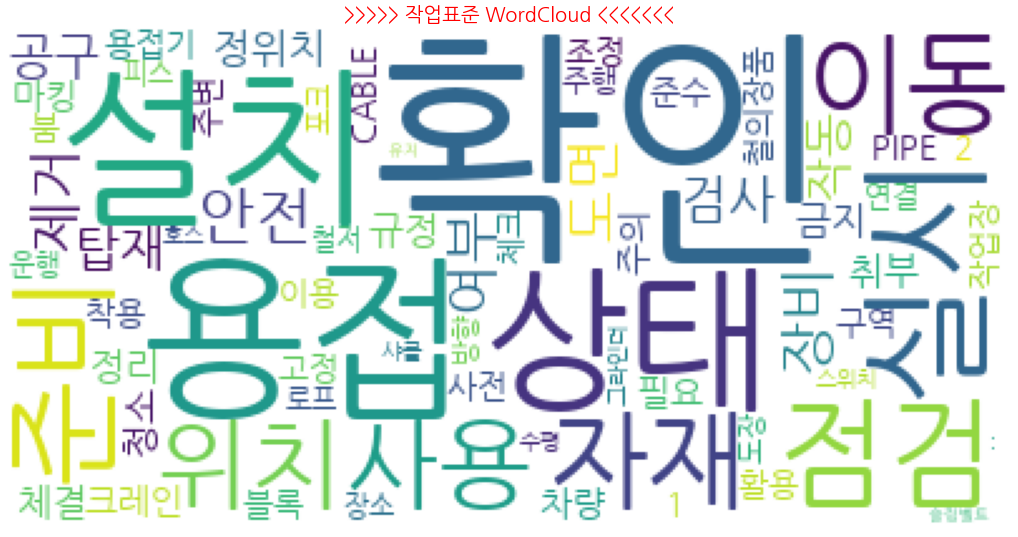

In [112]:
    nouns_counter = Counter(total_basket)
    cloud_data = dict(nouns_counter.most_common(70))
    
#     print(cloud_data)
    
    wc = WordCloud(background_color='white', font_path=fontpath)
    text = wc.generate_from_frequencies(cloud_data)
    figure = plt.figure(figsize=(18, 18))
    ax = figure.add_subplot(1, 1, 1)
    plt.title(">>>>> 작업표준 WordCloud <<<<<<<", fontsize=20, color='red')
    ax.axis('off')
    ax.imshow(wc)
    plt.savefig('./wordcloud.png')


In [118]:
import copy

In [119]:
df_visual = copy.deepcopy(df)

In [120]:
df_visual

,WORK_STAND_NM,WS_ID,WORK_UNIT,WORK_ACT,CHK_INFO,부서,대구분,중구분,소구분,keyword,위험_id,위험_id개수,R_vector
0,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,작업준비,도면 준비 및 자재/공구 준비,-,CHS공사부,후행의장,관철,장비&UNIT,"[, , 도면, 준비, 자재, 공구, 준비]",[],0,10.0
1,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,ANCHOR CHAIN 설치 준비,자재 입고 위치 확인,Dock 장 바닥 배열 가능 공간 확보 필요,CHS공사부,후행의장,관철,장비&UNIT,"[DOCK, 자재, 위치, 확인, 장, 바닥, 배열, 가능, 공간, 확보, 필요]",[],0,0.0
2,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,ANCHOR CHAIN 설치 준비,자재 입고 임시 적치,권상물 하부 인원 통제,CHS공사부,후행의장,관철,장비&UNIT,"[자재, 임시, 적치, 상물, 하부, 인원, 통제]",[idx_520],1,0.0
3,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,ANCHOR CHAIN 설치 준비,(Anchor Chain 배열 직전) 바닥 오염 방지 천막 배치,배열 전 바닥 오염 방지 천막 배치,CHS공사부,후행의장,관철,장비&UNIT,"[, ANCHOR, CHAIN, , 배열, 직전, 바닥, 오염, 방지, 배치, 배열...",[],0,0.0
4,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,ANCHOR CHAIN 설치,Anchor 배열,Bell Mouth 또는 Anchor Pocket 직하부로 배치 (배치 조건 가능 확인),CHS공사부,후행의장,관철,장비&UNIT,"[ANCHOR, BELL, MOUTH, ANCHOR, POCKET, , , 배열, ...",[],0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23625,화물차량(1/2.5/5ton) 운전 및 주정차,WS_1414,운전,"좌,우회전시 30M 전방에서 방향지시등 작동",,판넬조립부,기능,공통,차량운행,"[, 30M, 좌, 우회전, 전방, 방향, 지시, 작동]",[],0,0.0
23626,화물차량(1/2.5/5ton) 운전 및 주정차,WS_1414,운전,교차로 진입 시 전방 좌우 확인,교차로 15Km/h 이하 운행,판넬조립부,기능,공통,차량운행,"[15KM/H, 교차로, 진입, 전방, 좌우, 확인, 교차로, 운행]",[],0,0.0
23627,화물차량(1/2.5/5ton) 운전 및 주정차,WS_1414,주차,주정차 구역 확인 후 라인에 맞춰 주차,,판넬조립부,기능,공통,차량운행,"[주정차, 구역, 확인, 라인, 주차]",[],0,0.0
23628,화물차량(1/2.5/5ton) 운전 및 주정차,WS_1414,주차,주차 후 기어를 P로 놓고 주차 브레이크 체결,,판넬조립부,기능,공통,차량운행,"[P, 주차, 기어, 주차, 브레이크, 체결]",[],0,0.0
